## Section A. Model Complexity and Model Selection

### Question 2

1. A special case of K-Fold cross-validation is Leave-One-Out cross- validation
where K (i.e., the number of folds/subsets) is equal to the size of the
training dataset. In each iteration, one training data point is used as the
validation set. Implement a Leave-One-Out cross-validation (CV) function
for your KNN regressor:
**cv(train.data, train.label, K, numFold=?)**
 which takes the training data and their labels (continuous values), K
value, the number of folds, and returns errors for different folds of the
training data.

In [1]:
# KNN function
knn_2 <- function(train.data, train.label, test.data, K){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len),drop=FALSE]
    prediction_df = c()
    
    ## for each test sample
    for (i in 1:test.len){
        ### find its K nearest neighbours from training sampels
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        average = sum(train.label[nn])/K
        prediction_df[i] <- average
    }
    
    ## return the class labels as output
    return (prediction_df)
}

In [2]:
#LOOCV function
cv_1 <- function(train.data, train.label,K,numFold=nrow(train.data)) {
    error_k_fold = c()
    for (i in 1:numFold){
        validation_data = train.data[i,1,drop=FALSE]
        validation_label = train.label[i]
        training_data = train.data[-i,1,drop=FALSE]
        rownames(training_data) <- 1:nrow(training_data)
        training_label = train.label[-i]

        prediction = knn_2(training_data, training_label, validation_data,K)
        error = abs(validation_label  - prediction)
        
        
        error_k_fold[i] <- error
    }
    
    return (error_k_fold)
}

2. Using the training data in Question 1, run your Leave-One-Out CV. Change
the value of K=1,..,15 in your KNN regressor, and for each K compute the
average of error values you have got for folds. Plot the average of error
values versus 1/K for K=1,..,15 in your KNN regressor. Save the plot in your
Jupyter Notebook file for Question 2.

Reading train and test data

In [3]:
train_A = read.csv('Task1A_train.csv')
test_A = read.csv('Task1A_test.csv')

In [4]:
#slicing data for model

train_data_A = train_A[1:1]
cat("Train data")
head(train_data_A,3)
cat("Train Label")
train_label_A = train_A[,2]
head(train_label_A,3)
cat("Test data")
test_data_A = test_A[1:1]
head(test_data_A,3)

Train data

x1
1960.0
1960.5
1961.0


Train Label

[1] 0.71 0.85 0.61

Test data

x1
1960.25
1960.75
1961.25


In [5]:
#LOOCV function
cv_2 <- function(train.data, train.label,K,numFold) {
    error_k_fold = c()
    for (i in 1:numFold){
        validation_data = train.data[i,1,drop=FALSE]
        validation_label = train.label[i]
        training_data = train.data[-i,1,drop=FALSE]
        rownames(training_data) <- 1:nrow(training_data)
        training_label = train.label[-i]

        prediction = knn_2(training_data, training_label, validation_data,K)
        error = abs(validation_label  - prediction)
        
        
        error_k_fold[i] <- error
    }
    
    return (error_k_fold)
}

In [6]:
k_cv = c() #vector to store fold numbers
error <- c() # vector to store errors respective to each fold
for (k in 1:15) {
    
    error_k = cv_2(train_data_A,train_label_A,k,nrow(train_data_A))
    mean_error_k = mean(error_k)
    k_cv[k] <- k
    error[k] <- mean_error_k
}

knn_error_df = data.frame(k_fold = k_cv,error =error)
head(knn_error_df)

k_fold,error
1,0.4911905
2,0.3934524
3,0.3615873
4,0.3113690
5,0.3819524
6,0.4253571


Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

K,error,error_value
1,error,0.4911905
2,error,0.3934524
3,error,0.3615873
4,error,0.3113690
5,error,0.3819524
6,error,0.4253571


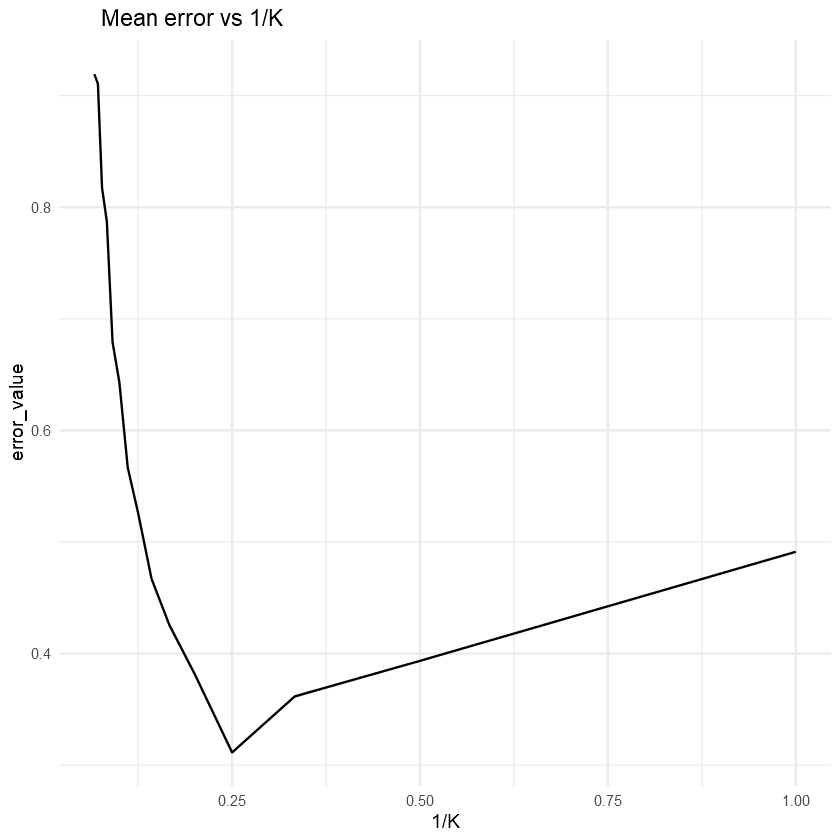

In [7]:
# install.packages("reshape2")
library(reshape2)
library(ggplot2)

miss.m <- melt(knn_error_df, id='k_fold') # reshape for visualization
names(miss.m) <- c('K', 'error', 'error_value')
head(miss.m)
#plotting error vs 1/K
ggplot(data=miss.m, aes(x=1/K, y=error_value)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() + ggtitle("       Mean error vs 1/K")

3. Report (in your Jupyter Notebook file) the optimum value for K based on
your plot for this Leave-One-Out cross validation in the previous part (Part
II). <br>
<br>


The optimum value for k is 4, as it corresponds to the lowest mean error from the LOOCV function